## Section 1: Derivation of differential equations for cyclotron motion

In this notebook, we will look at how to numerically solve the equations of motion for a charged particle with charge $q$, mass $m$ and velocity ${\bf v} $ moving in a uniform magnetic field ${\bf B}$. Our starting point is the equation for the Lorentz force (no electric field):

$$ {\bf F} = q {\bf v} \times {\bf B}.$$

Using this force as the net force in Newton's second law, we can find

$$ {\bf a} = \frac{d^2 {\bf r}}{d t^2} = \frac{q}{m} {\bf v} \times {\bf B},$$

where ${\bf a}$ is the acceleration and ${\bf r}$ the position of the particle.

We know from class that the component of motion parallel to the magnetic field remains unchanged. If we can align the $z$ axis so that ${\bf B} = B_0\, \hat{\bf{k}}$, then the acceleration in $z$ direction $a_z$ is zero and we can reduce the problem to a two-dimensional one. We obtain a set of two coupled differential equations of **second order** (since we have **second derivatives**):

$$ \begin{align}
\frac{d^2 r_x}{d t^2} & = \frac{B_0 q}{m} v_y \\
\frac{d^2 r_y}{d t^2} & = -\frac{B_0 q}{m} v_x
\end{align}
$$

We can change these **second-order** differential equations to a set of 4 coupled differential equations of **first order**:

$$ \begin{align}
\frac{d r_x}{d t} & = v_x &\\
\frac{d r_y}{d t} & = v_y &\\
\frac{d v_x}{d t} & = \frac{B_0 q}{m} v_y &=&  \: \omega \:  v_y\\
\frac{d v_y}{d t} & = -\frac{B_0 q}{m} v_x &=& - \omega v_x
\end{align}
$$

Thus, we have written the equations of motion as a set of 4 coupled first-order differential equations. We did this because a numerical or analytical solution is much easier for first-order differential equations than for second or higher-order differential equations. 
We simplified the above differential equations further by introducing the cyclotron frequency $\omega = B_0 q/m$.

## Section 2: Analytical solution for cyclotron motion

One can solve the set of four differential equations to arrive at the following general solutions (see Cyclotron_Motion_Solution.pdf on Canvas for more details):

$$ \begin{align}
r_x(t) =&\;\; \frac{v}{\omega}\:\sin(\omega t-\phi)+r_{xc}\\
r_y(t) =&\;\; \frac{v}{\omega}\: \cos(\omega t-\phi) +r_{yc}\\
v_x(t) =&\quad \, v \cos(\omega t-\phi) \\
v_y(t) =&\, -v \sin(\omega t-\phi) 
\end{align} $$

where the phase $\phi$ and initial velocities $v_x(t=0)=v_{x0}$ and $v_y(t=0)=v_{y0}$ are determined by the initial conditions. 

The position ($r_{xc},r_{yc}$) defines the centre of the circle of the particle's motion. The speed of the particle is $v = (v_{x0}^2 + v_{y0}^2)^{1/2}$. If we move the origin of the coordinate system to the centre of the circle  $(r_{xc},r_{yc}) = (0,0)$ and set the initial phase to zero, $\phi =0$, we can simplify the solutions without loss of generality:

$$ \begin{align}
r_x(t) =&\; \; \frac{v}{\omega} \: \sin(\omega t)\\
r_y(t) =&\; \; \frac{v}{\omega} \: \cos(\omega t)\\
v_x(t) =&\, \quad v \cos(\omega t) \\
v_y(t) =&\, -v \sin(\omega t) 
\end{align} $$

By inserting the solutions into the differential equations above, you can easily verify that the solutions are correct.

Having found the analytical solutions we want to plot them to see what they look like. As usual, we start with importing a couple of standard Python libraries.

**Code Snippet #0** (You will use the different Code snippets later to combine them to obtain a complete program)

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Recall that ```numpy``` is a numerical library that contains a lot of useful mathematical functions. In order to use those functions we have to use the prefix ```np.``` in front of the function. E.g. $sin(x)$ would be implemented as ```np.sin(x)``` in python. ```matplotlib``` is a plotting library that we will use.

### Initial conditions###

Next, we have to define our **inital conditions** and then we plot the solutions:

Consider a particle with  $\frac{q}{m}=1~\text{C/kg}$  moving in a uniform magnetic field of $1~\text{T}$ applied in $+z$-direction. At time $t=0$, it is located at $(r_{x0},r_{y0},r_{z0}) = (0, 10, 0)~\text{m}$ and is travelling at a speed of $v = 10~\text{m/s}$  in the $+x$-direction. Remember that we set the origin of the coordinate system to be the centre of the circular path that the particle will follow and the phase $\phi$ to 0.

We define the time range \[```start_time```, ```end_time```\] over which we want to track the motion of the particle by setting the initial time to zero and the number of loops to ```N_loops = 2```. Choose the number of steps per revolution to be ```steps_rev = 1000```. The cyclotron frequency ```omega``` as defined above determines the period of revolutions ```period_rev```. (Recall that the number $\pi$ is implemented as ```np.pi```.) The ``end_time`` can then be determined from the number of loops and the period for one revolution. 

**Code Snippet #1**

In [2]:
# ------------ INITIALISATION ---------------------

# --- INPUT ---

q_m_ratio = 1       # charge-to-mass ratio
b0 = 1              # magnetic field (homogeneous, in z direction) 

v = 10              # enter the correct initial velocity.
phi = 0             # enter the correct phase

rxc = 0             # enter the correct x-coordinate of the centre of the circle
ryc = 0             # enter the correct y-coordinate of the centre of the circle

start_time = 0      # enter the start time of the propagation
N_loops = 2         # enter number of loops the particle should complete 
steps_rev = 1000    # enter the number of time steps per revolution 

# --- calculate values from input variables

omega = b0*(q_m_ratio)             # calculate the cyclotron frequency (from the input variables)
print(omega)

period_osc = (2*np.pi)/(1/(q_m_ratio*(b0/2*np.pi)))                      # calculate the period of the oscillation (from the input variables)
# print(period_osc)

end_time = N_loops * period_osc                        # ¿ # calculate the end time of the propagation (from the input variables)
print(end_time)

time_steps = steps_rev * N_loops                       # calculate the number of time steps (from the input variables)
# print(time_steps)
# --- defininition of time array for propagation 

step = (end_time-start_time)/(time_steps-1)
# print(step)
time = np.linspace(start_time,end_time,time_steps)
print(time)

1
19.739208802178716
[0.00000000e+00 9.87454167e-03 1.97490833e-02 ... 1.97194597e+01
 1.97293343e+01 1.97392088e+01]


Note that ```time``` is an array going from ```time[0]``` to ```time[time_steps-1]```. The time interval of each time step is given by the variable ```step```.

Let's now calculate the analytical solution:

**Code snippet #2**

In [3]:
#ANALYTICAL SOLUTION of the differential equations
exact_position_x = v/omega*np.sin(omega*time - phi) + rxc   # multiplication with numpy array time
exact_position_y = v/omega*np.cos(omega*time - phi) + ryc   # yields a numpy array
exact_velocity_x = v*np.cos(omega*time - phi)
exact_velocity_y = -v*np.sin(omega*time - phi)

Note that ```time``` is a numpy array, thus the arrays ```exact_position_x/_y``` and ```exact_velocity_x/_y``` are also numpy arrays.

And now let's plot:

<IPython.core.display.Javascript object>


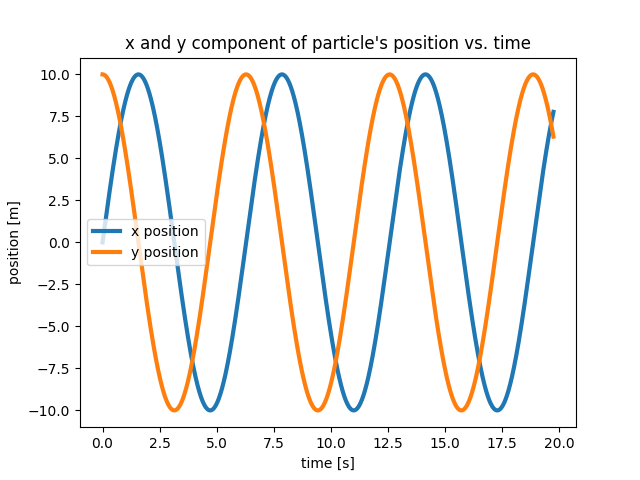

In [4]:
#Plot of exact solutions to check that they make sense.
plt.figure(1)
plt.plot(time,exact_position_x,linewidth=3,label='x position')
plt.plot(time,exact_position_y,linewidth=3,label='y position')
plt.legend()
plt.title(f"x and y component of particle's position vs. time")
plt.xlabel(f"time [s]") 
plt.ylabel(f"position [m]") 
plt.show()

<IPython.core.display.Javascript object>


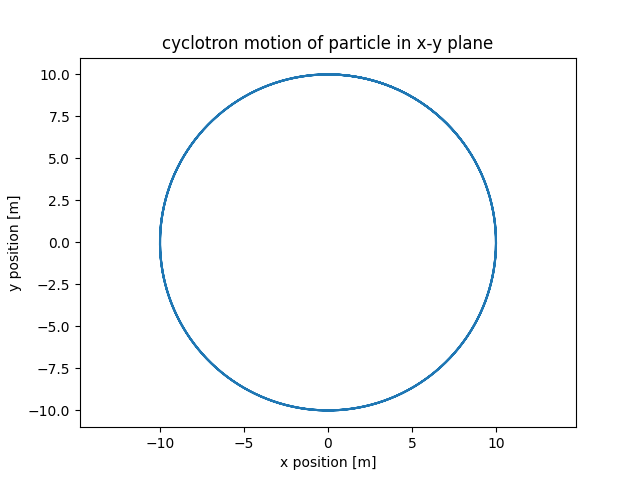

In [5]:
# If we plot r_y(t) against r_x(t), the result should be a circle.
plt.figure(2)
plt.plot(exact_position_x,exact_position_y)
plt.axis('equal') #scale of x and y axes is the same to show that motion is along a circle
plt.title(f"cyclotron motion of particle in x-y plane")
plt.xlabel(f"x position [m]") 
plt.ylabel(f"y position [m]") 
plt.show()

## Section 3: Numerical solution of the differential equations for cyclotron motion

### Section 3a: Euler method

We are now ready to try and solve the differential equations given above numerically. The numerical solution of differential equations is non-trivial and in fact scientists and mathematicians have spent decades designing algorithms for solving such equations.  The simplest algorithm for numerically integrating first-order differential equations is the Euler method (Early Transcendentals, § 9.3). 

Consider a single-variable differential equation of the form:

$$\frac{d y}{d t} =  F(y,t)$$

where $F$ is a function of $y$ and $t$. Note that $y$ itself depends on time and we should write $y(t)$, but we omit the explicit time dependence to simplify the notation here. 

Knowing the differential equation of a physical problem means that we know the slope of the sought solution $y(t)$ at every point in time $t$. In most physics problems, we also know the **initial condition** of the solution $y(t)$, ie. we know $y(t_0) = y_0$ at the initial time $t_0$.  

By multiplying the slope $F(y_0,t_0)$ with a small time step $h$ and adding it to the initial value $y_0$, we get an approximate solution for $y(t_1) = y_1$ at time $t_1 = t_0 + h$. Thus,

$$ y_1= y_0 + h \: F(y_0,t_0) \: .$$



One can then calculate an approximate solution for $y(t_2)=y_2$ from $y_1$ at $t_2 = t_1 + h$, using the slope at $y_1$ and $t_1$. We can then proceed to approximate $y_3$ at time $t_3$ from $y_2$ and so on. Thus, the general **Euler scheme** is given by:

$$ y_{n+1}= y_n + h \: F(y_n,t_n) \quad {\rm with} \quad t_{n+1} = t_n + h .$$


While this algorithm is simple to implement, numerical errors in the scheme scale badly with the time step $h$, and in order to avoid numerical instabilities and incorrect results, one can be forced to use prohibitively small time steps $h$. Nevertheless, we will use this scheme here for its simplicity. 

A video tutorial on the Euler method can be found here:
https://www.khanacademy.org/math/ap-calculus-bc/bc-differential-equations-new/bc-7-5/v/eulers-method

If you are interested in how to improve upon this method, you can learn about a superior algorithm, the Runge-Kutta scheme, in the Extra for Experts section at the end of this notebook. The numerical error in the Runge-Kutta method scales with $h^5$ instead of with $h$ for the Euler method. That means that halving the time step $h$ will halve the numerical  error made in the Euler scheme while it goes down to $2^{-5}$ for the Runge-Kutta algorithm.

### Section 3b: Implementation 

In order to implement the method and apply it to our problem, we first need to define arrays for ```time```, ```position``` and ```velocity```.

We are going to integrate the equations of motion from time $t=0$ to $t=$ ```end_time``` broken up into in a number of equally spaced time steps. We will use the same number of timesteps per revolution, given by the variable ```steps_rev``` as defined above, for the number of numerical integration steps that we will use for each loop. Increasing this variable decreases the time step $h$; it will give you a more accurate result but will also slow down the program. The array ```time``` contains the value of $t$ for each integration step. We will use the same array as used above for the plot of the analytical solution to make the comparison between the analytical and numerical solution easy. 

Next we define the arrays ```position_x``` and ```position_y``` as well as ```velocity_x``` and ```velocity_y``` to store the calculated values of the components of positions and velocities for each time step. Therefore, we set the length of the arrays to the number of time steps initialising the arrays with zeros.

**Code Snippet #3**

In [6]:
# initialisation of position and velocity arrays, setting everything to zero
position_x = np.zeros(time_steps)
position_y = np.zeros(time_steps)
velocity_x = np.zeros(time_steps)
velocity_y = np.zeros(time_steps)

Now we can implement the Euler algorithm. We have seen above that our problem can be written in the form of four coupled differential equations of first order:

$$ \begin{align}
\frac{d r_x}{d t} & = v_x \\
\frac{d r_y}{d t} & = v_y \\
\frac{d v_x}{d t} & = \omega \: v_y \\
\frac{d v_y}{d t} & = -\omega \: v_x
\end{align}
$$

We can re-write the above in vectorial notation, with ${\bf{y}}(t) = \begin{pmatrix} r_x(t)\\r_y(t)\\v_x(t)\\v_y(t) \end{pmatrix}$:

\begin{equation}
\frac{d \, {\bf{y}}(t)}{dt} = \begin{pmatrix} v_x \\ v_y \\ \omega \: v_y\\ -\omega \: v_x \end{pmatrix} = 
{\bf{F}}({\bf{y}}(t),t) = {\bf{F}}({\bf{y}}(t)) 
\end{equation}

Note that there is no explicit time dependence of ${\bf{F}}({\bf{y}}(t),t)$, so we can just write ${\bf{F}}({\bf{y}}(t))$ here.

Remember for the following part that, in Python notation, $y\left[0\right]=r_x$, $y\left[1\right]=r_y$, $y\left[2\right]=v_x$ and  $y\left[3\right]=v_y$. 

First, we will define a function ```der``` that returns the vector of the derivatives. 

**Code Snippet #4**

In [7]:
# --- Definition of the derivative of y(t), F(y(t)) ---
#
# Input:  yin :  vector y (numpy array)
#         omega: cyclotron frequency
# Output: derivative of vector yin, F(yin) (numpy array)

def der(yin, omega):                                              # no explicit time dependence
    return np.array([yin[2],yin[3],omega*yin[3],-omega*yin[2]])

# print(der((0,1,1,0),1))

Next, we define a second function that implements a single Euler step, $ y_{\rm out}= y_{\rm in} + h \: F(y_{\rm in})$.

In [8]:
yin = position_x, position_y,velocity_x, velocity_y

# print(yin)

yout = yin + time_steps*der(yin, omega)

# print(yout)

**Code Snippet #5**

In [9]:
# --- Implementation of Euler method
# Input: yin - initial vector of position and velocity
#        omega - cylcotron frequency
#        step - time step
#
# Output: yout - propagated vector of position and velocity

def euler(yin,omega,step):
    #complete the function definition here
    return yin + step*der(yin, omega)

print(euler((0,1,1,0),1,1))

[ 1  1  1 -1]


Next, we define the initial conditions (we can get them from using the exact solutions a $t$ = 0). Then, we go from one time step to the next using the function for the Euler method defined above.

**Code Snippet #6**

In [10]:
#--- Input of initial conditions

position_x[0] = 0.0        # initial position
position_y[0] = v/omega  
velocity_x[0] = v          # initial velocity
velocity_y[0] = 0.0  

yin = np.zeros(4)          # initialisation of yin

yin[0] = position_x[0]     # start with initial conditions 
yin[1] = position_y[0]
yin[2] = velocity_x[0]
yin[3] = velocity_y[0]

#--- Propagation

for ii in range(1,time_steps):
    yin = euler(yin,omega,step)                    # calculation of yout (which immediately overwrites the old yin!)
    
    position_x[ii] = yin[0]                        # save the new position and velocity components
    position_y[ii] = yin[1]
    velocity_x[ii] = yin[2]
    velocity_y[ii] = yin[3]

Now, let's plot the numerical solution and compare with the analytical one.

** Code snippet #7**

<IPython.core.display.Javascript object>


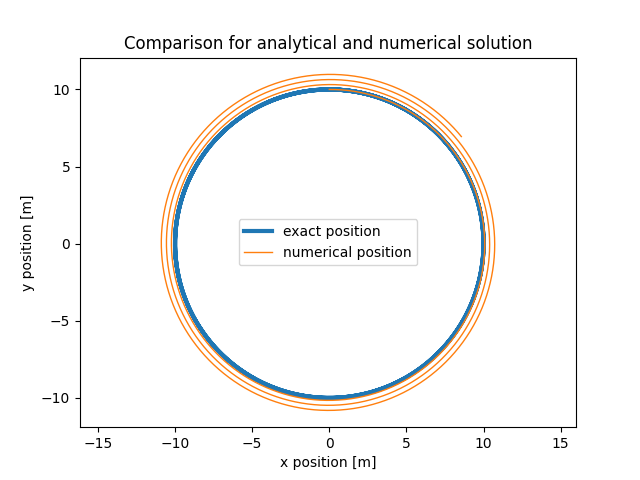

In [11]:
plt.figure(3)
plt.plot(exact_position_x,exact_position_y,linewidth=3,label='exact position')
plt.plot(position_x,position_y,linewidth=1,label='numerical position')
plt.axis('equal')
plt.legend()
plt.title(f"Comparison for analytical and numerical solution")
plt.xlabel(f"x position [m]") 
plt.ylabel(f"y position [m]") 
plt.show()

Note that even at the end of the integration period the numerical solution is still quite accurate.

** Code snippet #8**

<IPython.core.display.Javascript object>


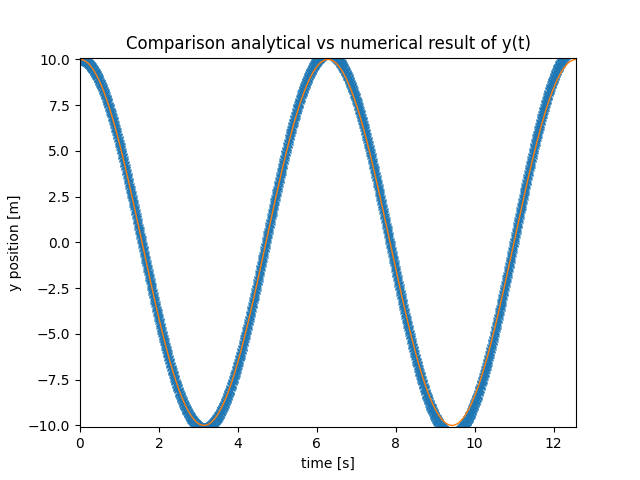

In [12]:
# y-t plot of cyclotron motion 
# comparison analytical vs. numerical solution

plt.figure(4)
plt.plot(time,position_y,'x',label='numerical position')
plt.plot(time,exact_position_y,linewidth=1,label='Analytical position')
plt.axis([0,N_loops*2*np.pi/omega,-1*(position_y[0]+0.1),position_y[0]+0.1])
plt.title(f"Comparison analytical vs numerical result of y(t)")
plt.xlabel(f"time [s]") 
plt.ylabel(f"y position [m]") 
plt.legend
plt.show()

###  <span style="color: red;"> Task 3: Combine the code snippets #0 - #8 to make a single program. Use the finished program to do the following:
</span>

<span style="color: red;">    (a) Increase the number of loops to 8; comment on the change in accuracy you observe.</span>
    
    
<span style="color: red;">    (b) Think about a parameter you can change to make the error in the numerical solution smaller. Describe your idea and check it by running the program for 8 loops with the changed parameter. </span>

<span style="color: red;">    (c) Determine and describe what happens to the radius of the path if the initial speed is doubled? And then halved? Are these results what you expect from the equations derived above?</span>

** Code snippet #9 **

[-14.58740368  10.45110112  10.45110112  14.58740368]


<IPython.core.display.Javascript object>


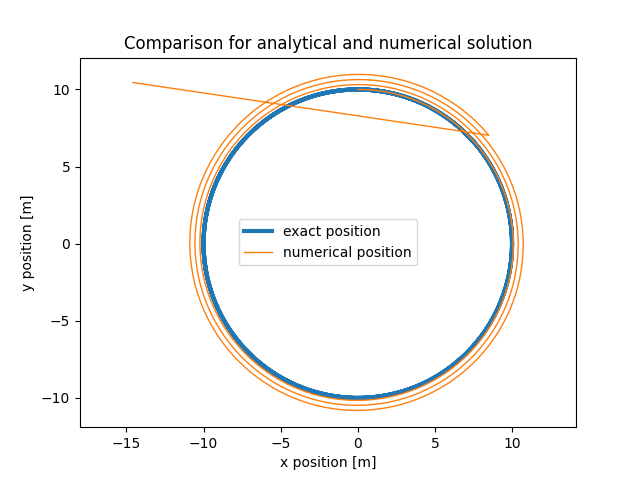

<IPython.core.display.Javascript object>


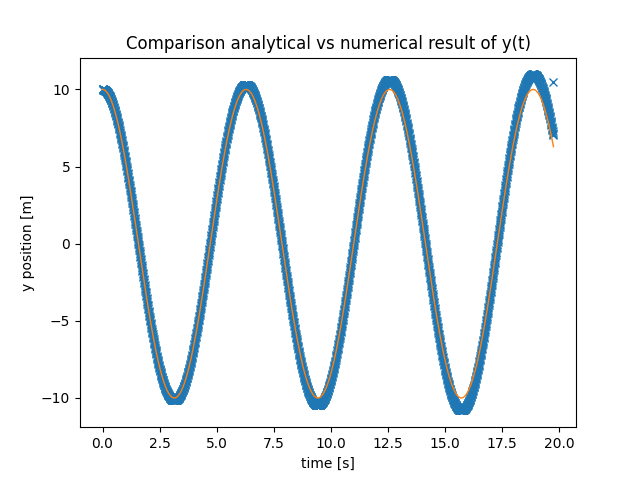

In [17]:
N_loops = 8

# yin = np.zeros(4)

for i in range(1, time_steps):
    yin = euler(yin,omega,step)                    # calculation of yout (which immediately overwrites the old yin!)
    
    position_x[ii] = yin[0]                        # save the new position and velocity components
    position_y[ii] = yin[1]
    velocity_x[ii] = yin[2]
    velocity_y[ii] = yin[3]

print(yin)

plt.figure(5)
plt.plot(exact_position_x,exact_position_y,linewidth=3,label='exact position')
plt.plot(position_x,position_y,linewidth=1,label='numerical position')
plt.axis('equal')
plt.legend()
plt.title(f"Comparison for analytical and numerical solution")
plt.xlabel(f"x position [m]") 
plt.ylabel(f"y position [m]") 
plt.show()

plt.figure(6)
plt.plot(time,position_y,'x',label='numerical position')
plt.plot(time,exact_position_y,linewidth=1,label='Analytical position')
# plt.axis([0,N_loops*2*np.pi/omega,-1*(position_y[0]+0.1),position_y[0]+0.1])
plt.title(f"Comparison analytical vs numerical result of y(t)")
plt.xlabel(f"time [s]") 
plt.ylabel(f"y position [m]") 
plt.legend
plt.show()